<a href="https://colab.research.google.com/github/IagoAlmeida-ias/Python-para-Data-Science/blob/main/An%C3%A1lisePreditiva_t1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Preditiva

# Regressão Linear:

In [ ]:
# Análise Preditiva
#-- 1º Regressão linear
# ---- *Simples    ------ Uma variável
# ---- *Múltipla   ------ Multiplas variáveis

In [ ]:
# Pacotes de Manipulação de Dados

import numpy as np
import pandas as pd

# Pacotes gráficos

import matplotlib.pyplot as plt
import seaborn as sns

# Pacotes de Modelagem
import statsmodels.api as sm

In [ ]:
# Importação da base de dados

df = pd.read_csv('base_funcionarios_v1.csv', delimiter=';', index_col='id')
df

,Salario,Anos_Educ_Superior
id,,
1,5517.4,3
2,6399.9,4
3,6206.7,6
4,6060.6,4
5,6122.7,2
6,6955.0,5
7,7643.0,4
8,6210.2,2
9,5761.0,9


In [ ]:
df.head()

,Salario,Anos_Educ_Superior
id,,
1,5517.4,3
2,6399.9,4
3,6206.7,6
4,6060.6,4
5,6122.7,2


In [ ]:
df.tail()

,Salario,Anos_Educ_Superior
id,,
42,5499.4,5
43,8521.6,8
44,5170.9,1
45,6235.4,4
46,11460.2,12


In [ ]:
df.shape

(46, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, 1 to 46
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Salario             46 non-null     float64
 1   Anos_Educ_Superior  46 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [ ]:
df.duplicated('Salario').sum()   # Já mostra que não tem salarios iguais

np.int64(0)

In [ ]:
df.isnull().sum()

,0
Salario,0
Anos_Educ_Superior,0


In [ ]:
df.describe().round(1)

,Salario,Anos_Educ_Superior
count,46.0,46.0
mean,6969.8,5.1
std,1924.9,2.8
min,4139.5,0.0
25%,5818.4,4.0
50%,6394.8,5.0
75%,7972.4,6.0
max,12118.1,12.0


# Complementando - Análise Exploratória dos Dados

<Axes: xlabel='Anos_Educ_Superior', ylabel='Salario'>

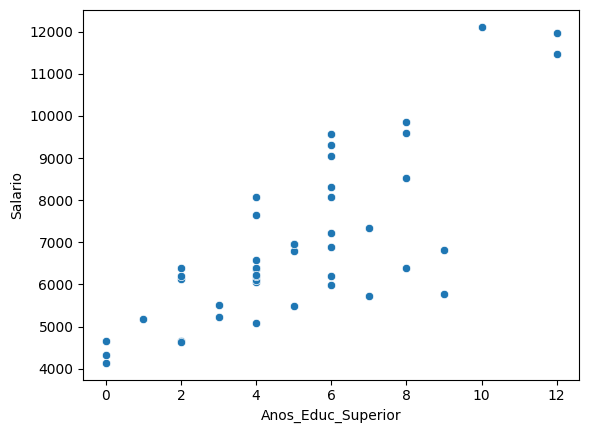

In [ ]:
# Gráfico de Dispersão

sns.scatterplot(x=df['Anos_Educ_Superior'],
                y=df['Salario']);

In [ ]:
# Correlação linear Pearsen ----- Se não retorna mais 0.6 (Está mais proxim da Relação nula)

df.corr()

,Salario,Anos_Educ_Superior
Salario,1.000000,0.776992
Anos_Educ_Superior,0.776992,1.000000


<Axes: >

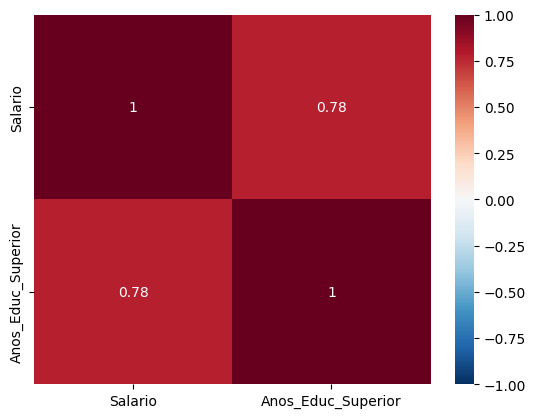

In [ ]:
# Grafico HeatMap

sns.heatmap(df.corr(), cmap='RdBu_r', annot=True, vmin=-1, vmax=1)

# Ajuste o Modelo de Regressão Linear

In [ ]:
# Variável resposta

y = df['Salario']

# Variável explicativa
df['intercepto'] = 1
x = df[ ['intercepto','Anos_Educ_Superior'] ]

In [ ]:
# ajuste do Modelo

modelo = sm.OLS(y,x)
res = modelo.fit()

In [ ]:
# REsultado do ajuste do modelo

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                Salario   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     67.03
Date:                Wed, 16 Jul 2025   Prob (F-statistic):           2.18e-10
Time:                        19:05:57   Log-Likelihood:                -391.36
No. Observations:                  46   AIC:                             786.7
Df Residuals:                      44   BIC:                             790.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercepto          4301.7990    372

# ↑↑↑↑↑↑↑

1. Ads. R-squared (R²)

2. Valor P>|t|

3. Coeficientes
 * -- Formula Salario

* Sala = B0 + B1 * Anos
* B0 = Salario / 4301.79
* B1 = Anos_Educ / 526.72

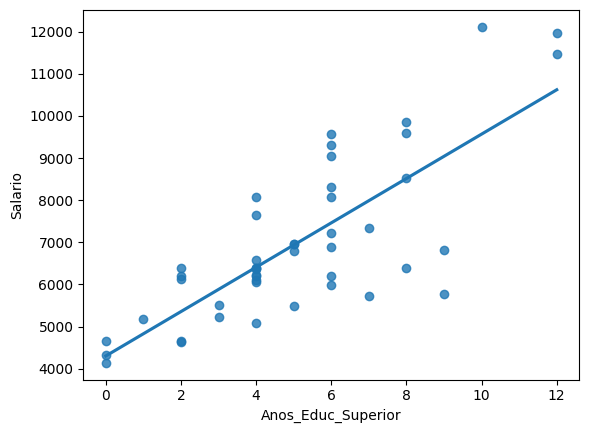

In [ ]:
# Gráfico de Dispersão

sns.regplot(x=df['Anos_Educ_Superior'],
                y=df['Salario'], ci=None);